# Analyzing COVID RNA Sequences

By Jeri Stewart

## Project Overview

In this project, analysis on the data on RNA sequences of COVID in two of its major variants: Delta and Omicron will be conducted. RNA is the "source code" for COVID that enables the virus to enter the cell and replicate itself. RNA is a nucleic acid present in any living cell that has one strand consisting of various combinations of four nucleotides: uracil (U), cytosine (C), adenine (A), and guanine (G). 


### Dataset

The data is available from the  NIH (National Institutes of Health), the federal government agency in the U.S. The dataset containing the metadata for each COVID RNA sequence from this link and look at its documentation here. 

## Metadata Analysis

In [1]:
# Install pandas, biopython, and ipython using conda
import sys

!conda install --yes --prefix {sys.prefix} pandas biopython ipython


Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda_Files

  added / updated specs:
    - biopython
    - ipython
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.78             |  py311h2bbff1b_0         2.6 MB
    ipython-8.15.0             |  py311haa95532_0         1.5 MB
    openssl-1.1.1w             |       h2bbff1b_0         5.5 MB
    pandas-2.1.1               |  py311hf62ec03_0        13.5 MB
    python-tzdata-2023.3       |     pyhd3eb1b0_0         140 KB
    ------------------------------------------------------------
                                           Total:        23.2 MB

The following NEW packages will be INSTALLED:

  biopython          pkgs/main/win-64::biopython-1.78-py311h2bbff1b_0 
  python-tzdata      pkgs/main/noarch::python-tzdata-2023.3-pyhd3eb1b0_0 

The following packages will be UP

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304

In [3]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Step 1: Read the metadata from the CSV file into a pandas DataFrame
metadata = pd.read_csv('ncbi_datasets.csv')

# Step 2:  Display the first few rows of the DataFrame to get an overview of the data
print("First few rows of the DataFrame:")
metadata.head()



C:\Users\jerij\AppData\Local\Temp\ipykernel_29180\3394753686.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('ncbi_datasets.csv')


First few rows of the DataFrame:


,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [4]:
# Get the number of rows and columns in the DataFrame
num_rows, num_columns = metadata.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Get data types of each column in the DataFrame
data_types = metadata.dtypes
print("Data types of columns:")
print(data_types)



Number of rows: 847791
Number of columns: 16
Data types of columns:
Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object


In [12]:
# Step 3: Convert the 'Collection Date' column to datetime data type

metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"], errors='coerce')

# Verify datetime conversion
data_types = metadata.dtypes
print("Data types of columns:")
print(data_types)


Data types of columns:
Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object


In [13]:
# Convert column names to lowercase and replace spaces with underscores
metadata.columns = metadata.columns.str.lower().str.replace(' ', '_')

# Display column names
print(metadata.columns)



Index(['nucleotide_accession', 'species_taxonomy_id', 'species_name',
       'virus_genus', 'virus_family', 'isolate_name', 'nucleotide_length',
       'sequence_type', 'nuc_completeness', 'geo_location', 'us_state',
       'host_name', 'host_taxonomy_id', 'collection_date', 'bioproject',
       'biosample'],
      dtype='object')


In [14]:
# Create a continent column

metadata["continent"] = metadata["geo_location"].str.replace(";.+", "", regex=True)

In [16]:
metadata.head()

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,NaT,PRJNA614995,SAMN25559487,North America
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,NaT,NaN,NaN,Asia
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,NaT,NaN,NaN,Asia
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,NaT,PRJNA614995,SAMN23427251,North America


In [21]:
# Details first colllection date (or close to the collection date) for each continent

metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL913312.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/KEN/NIC_084/2020,29782,GenBank,complete,Africa; Kenya,NaN,NaN,9606,2020-03-01,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,MT270105.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/DEU/BavPat5-ChVir1248/2020,29860,GenBank,complete,Europe; Germany: Bavaria,NaN,NaN,9606,2020-01-01,NaN,NaN,Europe
North America,MT951951.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/VA-DCLS-0583/2020,29882,GenBank,complete,North America; USA: Virginia,NaN,NaN,9606,2020-03-01,NaN,NaN,North America
Oceania,MZ331924.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/NZL/20VR1275/2020,29782,GenBank,complete,Oceania; New Zealand,NaN,NaN,9606,NaT,PRJNA648792,SAMN15769785,Oceania
South America,MT670015.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHL/2020-25343/2020,29782,GenBank,complete,South America; Chile,NaN,NaN,9606,NaT,NaN,NaN,South America


In [22]:
metadata["continent"].value_counts()


continent
North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: count, dtype: int64

In [23]:
metadata["nucleotide_length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

In [26]:
# Mininum seems oddly low. Investigate row with this data

metadata[metadata['nucleotide_length'] == metadata['nucleotide_length'].min()]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,NaT,PRJEB39632,SAMEA7098098,Europe


Data indicates that the genome is complete so data may suggest that nucleotide length may be a typo/ incorrect entry/ forgotten 0

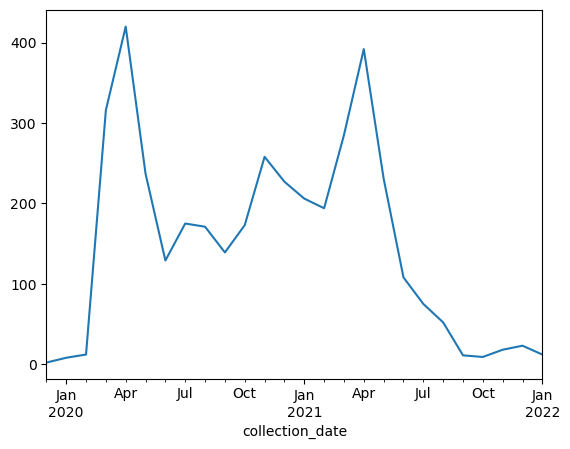

In [32]:
# Create a new Series 'sample_month' containing the year-month part of the dates
sample_month = metadata['collection_date'].dt.to_period('M')

import matplotlib.pyplot as plt

# Count the occurrences of each month and plot
sample_month.value_counts().sort_index().plot()

# Display the plot
plt.show()

The dramatic increase may be due to the omicron variant which poses a higher transmission rate than any other variants. As a lot of people were infected and sequencing was done to detect the variant, the number of fasta submissions to the database was also increasing.

##  Identifying Sequences to Analyze

In [36]:
# Identify the reference sequence which is the first COVID genome that was fully sequenced.

metadata[metadata["sequence_type"] == "RefSeq"]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


In [37]:
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,NaT,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [38]:
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [39]:
sequences = ["NC_045512.2", "MT951951.1", "OM061695.1", "OM095411.1"]
human_names = ["reference", "base", "delta", "omicron"]

In [40]:
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]

In [42]:
selected_sequences

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
287,MT951951.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/VA-DCLS-0583/2020,29882,GenBank,complete,North America; USA: Virginia,NaN,NaN,9606,2020-03-01,NaN,NaN,North America
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,NaT,NaN,NaN,Asia


In [57]:
from Bio import Entrez

# Set your email address for Entrez
Entrez.email = "jerijuba@gmail.com"

# Function to retrieve nucleotide sequence by accession number
def download_sequence(id_code):
        handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
        record = Entrez.read(handle)
        handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
        return handle.read()

# Create a sequence data dictionary
sequence_data = {}
for sequence in sequences:
   sequence_data[sequence] = {"fasta": download_sequence(sequence)}



Note:
FASTA format is a text-based format for representing either nucleotide sequences or peptide sequences, in which base pairs or amino acids are represented using single-letter codes. A sequence in FASTA format begins with a single-line description, followed by lines of sequence data.

In [59]:
from Bio import SeqIO
import io

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]

In [65]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

## Aligning RNA Sequences

In [63]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [64]:
aligner.algorithm

'Needleman-Wunsch'

The Needleman–Wunsch algorithm is an algorithm used in bioinformatics to align protein or nucleotide sequences.

 The alignment score is the sum of substitution scores and gap penalties. 

In [69]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)

In [70]:
score

29818.0

In [71]:
len(sequence_data["NC_045512.2"]["parsed"].seq)

29903

In [72]:
29818.0 / 29903

0.9971574758385446

Very close alignment between the reference seqeunce and the first covid sequenced in North America indication little mutation upon entry into NA.

## Checking Alignment Across Variants

In [74]:
import numpy as np

comparisons = np.zeros((4,4))



In [76]:
comparisons

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [77]:
for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [80]:
comparisons_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

In [81]:
comparisons_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29873.0,29882.0,0.0,0.0
delta,29818.0,29811.0,29858.0,0.0
omicron,29725.0,29717.0,29688.0,29788.0


In [83]:
comparisons_df.iloc[:,0] / 29903.0


reference    1.000000
base         0.998997
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

Demonstrates as time progress, the level of mutation for the virus increases.

## Showing Sequence Mismatches

In [93]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq

delta_alignments = aligner.align(seq1, seq2)

In [94]:
delta_alignments

In [102]:
delta_alignment = delta_alignments[0]

In [104]:
#see points where sequences were aligned and not aligned

delta_alignment.aligned

(((0, 209),
  (210, 212),
  (212, 240),
  (241, 1047),
  (1048, 1273),
  (1274, 1276),
  (1276, 3036),
  (3037, 3038),
  (3038, 4180),
  (4181, 6401),
  (6402, 7123),
  (7123, 7124),
  (7125, 8985),
  (8986, 8989),
  (8989, 9052),
  (9053, 9054),
  (9054, 10028),
  (10028, 10029),
  (10030, 10506),
  (10507, 11116),
  (11117, 11200),
  (11201, 11331),
  (11332, 11333),
  (11333, 14407),
  (14408, 14409),
  (14409, 15450),
  (15450, 15451),
  (15452, 16465),
  (16466, 19219),
  (19220, 19221),
  (19221, 21617),
  (21618, 21986),
  (21987, 22028),
  (22029, 22030),
  (22033, 22035),
  (22037, 22916),
  (22917, 22918),
  (22918, 22994),
  (22995, 22996),
  (22996, 23402),
  (23403, 23603),
  (23604, 24409),
  (24410, 24411),
  (24411, 25087),
  (25088, 25090),
  (25090, 25351),
  (25352, 25353),
  (25353, 25468),
  (25469, 26423),
  (26424, 26425),
  (26425, 26766),
  (26767, 26768),
  (26768, 27526),
  (27527, 27637),
  (27637, 27639),
  (27640, 27751),
  (27752, 27873),
  (27874, 27876)

In [112]:
# Display all the mismtaches between the referencce sequence and the Delta seqeunce

seq1_end = None
seq2_end = None
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))
              
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]
              

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


## Color Coding Mismatches

In [126]:
from IPython.display import HTML, display, Markdown

In [127]:
def color_print(s, color="black"):
     return "<span style='color={}'>{}</span>".format(color, s)

In [128]:
seq1_end = None
seq2_end = None
display_seq = []

for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]
        
        if len(seq2_mismatch) == 0:
            display_seq.append(color_print(seq1_mismatch, "red")) #deletion
        elif len(seq1_mismatch) == 0:
             display_seq.append(color_print(seq2_mismatch, "green")) #insertion
        else:
            display_seq.append(color_print(seq2_mismatch, "blue")) #substition
    
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
              
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [129]:
display_seq = [str(i) for i in display_seq]


In [130]:
display(HTML('<br>'.join(display_seq)))

In [134]:
# alternatie method using ANSI escape codes for terminal text coloring

# Initialize variables for colored display
seq1_end = None
seq2_end = None
display_seq = []

def colored_text(text, color_code):
    return f"\033[{color_code}m{text}\033[0m"

for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end is not None and seq2_end is not None:
        seq1_mismatch = seq1[seq1_end: alignments[0][0]]
        seq2_mismatch = seq2[seq2_end: alignments[1][0]]

        if len(seq2_mismatch) == 0:
            display_seq.append(colored_text(seq1_mismatch, "31"))  # Deletion (red)
        elif len(seq1_mismatch) == 0:
            display_seq.append(colored_text(seq2_mismatch, "32"))  # Insertion (green)
        else:
            display_seq.append(colored_text(seq2_mismatch, "34"))  # Substitution (blue)

    display_seq.append(seq1[alignments[0][0]:alignments[0][1]]) 

    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

# Convert the elements to strings
display_seq = [str(i) for i in display_seq]

# Display the colored text with line breaks
print("\n".join(display_seq))


# black sequences will showed aligned sequences

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGT
G
TT
T
GCAGCCGATCATCAGCACATCTAGGTTT
T
GTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGA